# ML Assignment 4 – Logistic Regression, Decision Tree, KNN
## Campus Placement Prediction


In [45]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier

## 1.	Data Preprocessing:
### 1.1.	Load the Dataset: 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/campus_placement.csv")
df.head(5)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [3]:
df1 = df.copy()

### 1.2.	Handle Missing Values: 

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [5]:
df1.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [27]:
df1.shape

(10000, 12)

In [6]:
df1.duplicated().sum()

0

### 1.3.	Encode Categorical Features: 

In [12]:
le=LabelEncoder()

In [9]:
df1['ExtracurricularActivities'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df1['ExtracurricularActivities']=le.fit_transform(df1['ExtracurricularActivities'])

print('No - 0')
print('Yes - 1')

No - 0
Yes - 1


In [10]:
df1['PlacementTraining'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df1['PlacementTraining']=le.fit_transform(df1['PlacementTraining'])

print('No - 0')
print('Yes - 1')

No - 0
Yes - 1


In [11]:
df1['PlacementStatus'].unique()

array(['NotPlaced', 'Placed'], dtype=object)

In [19]:
df1['PlacementStatus']=le.fit_transform(df1['PlacementStatus'])

print('NotPlaced - 0')
print('Placed - 1')

NotPlaced - 0
Placed - 1


In [16]:
df1.head(5)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


### 1.4.	Feature Selection: 

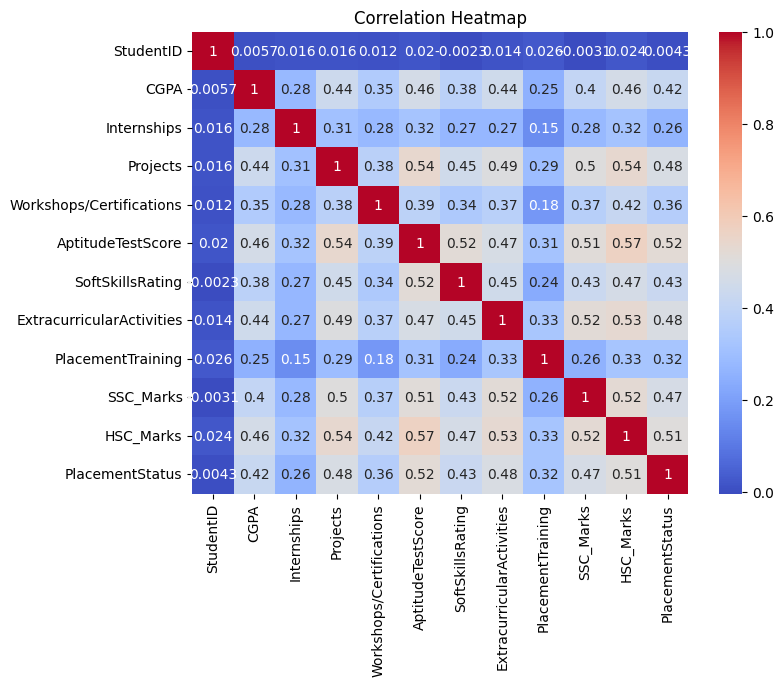

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [22]:
X=df1.drop('PlacementStatus',axis=1)
X.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,1,7.5,1,1,1,65,4.4,0,0,61,79
1,2,8.9,0,3,2,90,4.0,1,1,78,82
2,3,7.3,1,2,2,82,4.8,1,0,79,80
3,4,7.5,1,1,2,85,4.4,1,1,81,80
4,5,8.3,1,2,2,86,4.5,1,1,74,88


In [23]:
y = df1['PlacementStatus']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: PlacementStatus, dtype: int64

### 1.5.	Data Splitting: 

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
print(f" X_train.shape : {X_train.shape} ")
print(f" X_test.shape : {X_test.shape} ")
print(f" y_train.shape : {y_train.shape} ")
print(f" y_test.shape : {y_test.shape} ")

 X_train.shape : (8000, 11) 
 X_test.shape : (2000, 11) 
 y_train.shape : (8000,) 
 y_test.shape : (2000,) 


### 1.6.	Feature Scaling:

In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2.	Logistic Regression - Model Building and Evaluation:
### 2.1.	Model Building: 
### 2.2.	Model Evaluation: 

In [38]:
# Try different values for max_iter
max_iters = [100, 200, 300, 500]

for i in max_iters:
    print(f"\nLogistic Regression with max_iter = {i}")
    print("-"*40)
    model = LogisticRegression(max_iter=i, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Model Evaluation:
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression with max_iter = 100
----------------------------------------
Accuracy: 0.7935
Confusion Matrix:
 [[953 219]
 [194 634]]

Logistic Regression with max_iter = 200
----------------------------------------
Accuracy: 0.7935
Confusion Matrix:
 [[953 219]
 [194 634]]

Logistic Regression with max_iter = 300
----------------------------------------
Accuracy: 0.7935
Confusion Matrix:
 [[953 219]
 [194 634]]

Logistic Regression with max_iter = 500
----------------------------------------
Accuracy: 0.7935
Confusion Matrix:
 [[953 219]
 [194 634]]


## 3.	Decision Tree - Model Building and Evaluation:
### 3.1.	Model Building: 
### 3.2.	Model Evaluation: 

In [44]:
depths = [2, 3, 4, 5, 10, None] 
for depth in depths:
    print(f"\nDecision Tree with max_depth = {depth}")
    print("-"*35)

    # Create Decision Tree Classifier with entropy
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=42)
    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_test_scaled)

    # 3.2.	Model Evaluation: 
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Decision Tree with max_depth = 2
-----------------------------------
Model Accuracy: 0.7435
Confusion Matrix:
 [[870 302]
 [211 617]]

Decision Tree with max_depth = 3
-----------------------------------
Model Accuracy: 0.7770
Confusion Matrix:
 [[877 295]
 [151 677]]

Decision Tree with max_depth = 4
-----------------------------------
Model Accuracy: 0.7815
Confusion Matrix:
 [[937 235]
 [202 626]]

Decision Tree with max_depth = 5
-----------------------------------
Model Accuracy: 0.7810
Confusion Matrix:
 [[941 231]
 [207 621]]

Decision Tree with max_depth = 10
-----------------------------------
Model Accuracy: 0.7670
Confusion Matrix:
 [[946 226]
 [240 588]]

Decision Tree with max_depth = None
-----------------------------------
Model Accuracy: 0.7240
Confusion Matrix:
 [[887 285]
 [267 561]]


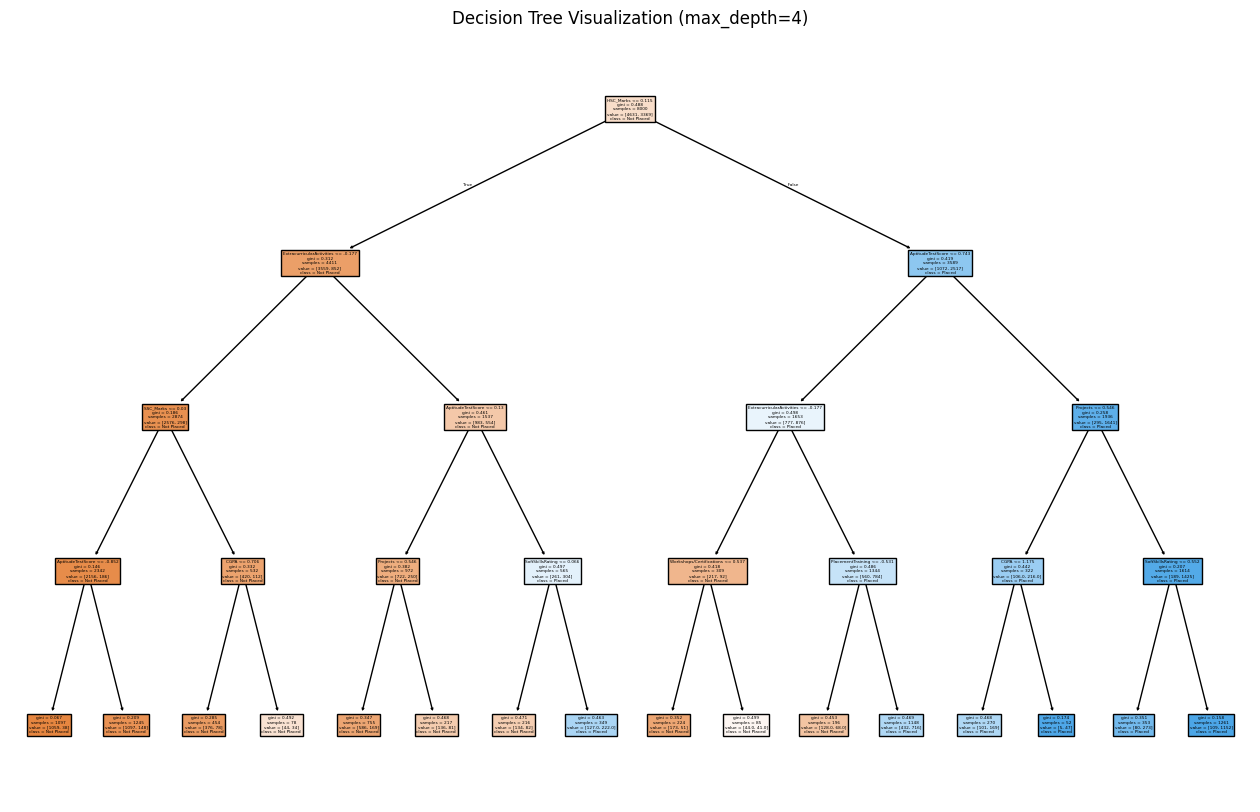

In [46]:
best_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
best_tree.fit(X_train_scaled, y_train)

plt.figure(figsize=(16, 10))
plot_tree(best_tree, feature_names=X.columns, class_names=["Not Placed", "Placed"], filled=True)
plt.title("Decision Tree Visualization (max_depth=4)")
plt.show()

## 4.	K-Nearest Neighbors (KNN) - Model Building and Evaluation:
### 4.1.	Model Building:
### 4.2.	Model Evaluation: 

In [50]:
k_values = [1, 3, 5, 11]
accuracies = {}

for k in k_values:
    print(f"\nKNN with k = {k}")
    print("-"*20)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)

    # 4.2.	Model Evaluation: 
    acc = accuracy_score(y_test, y_pred)
    accuracies[k] = acc
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


KNN with k = 1
--------------------
Accuracy: 0.7290
Confusion Matrix:
 [[894 278]
 [264 564]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      1172
           1       0.67      0.68      0.68       828

    accuracy                           0.73      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.73      0.73      0.73      2000


KNN with k = 3
--------------------
Accuracy: 0.7535
Confusion Matrix:
 [[923 249]
 [244 584]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1172
           1       0.70      0.71      0.70       828

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000


KNN with k = 5
--------------------
Accuracy: 0.7710
Confusion Matrix:
 [[950 222]
 [236 592]]
Classifica

### 4.3.	Reporting: 

In [52]:
print("\nK Value vs Accuracy")
for k, acc in accuracies.items():
    print(f"k = {k}: Accuracy = {acc:.4f}")

best_k = max(accuracies, key=accuracies.get)
print(f"\nBest k: {best_k} with Accuracy = {accuracies[best_k]:.4f}")


K Value vs Accuracy
k = 1: Accuracy = 0.7290
k = 3: Accuracy = 0.7535
k = 5: Accuracy = 0.7710
k = 11: Accuracy = 0.7895

Best k: 11 with Accuracy = 0.7895


## 5.	Comparison and Analysis:
- ### 5.1.	Compare the accuracy scores of the three models.

### Model - Logistic Regression :
##### Parameters Used [max_iter = 100–500] 
##### Best Accuracy = 0.7935 

### Model - Decision Tree :
##### Parameters Used [max_depth = 4] 
##### Best Accuracy = 0.7815

### Model - K-Nearest Neighbors :
##### Parameters Used [k = 11] 
##### Best Accuracy = 0.7895

- Logistic Regression produced consistent results across all iterations.

- Decision Tree performed best at max_depth = 4.

- KNN performed best with k = 11.

- ### 5.2.	Discuss which model performed best and why, based on the accuracy scores and other relevant factors.

Logistic Regression performed the best with the highest accuracy of 0.7935. It likely worked well because the data has relatively linear relationships and Logistic Regression generalizes better without overfitting. KNN was close behind (0.7895), while Decision Tree showed more variation and signs of overfitting at deeper depths.

- ### 5.3.	Reflect on the strengths and weaknesses of each model in the context of this dataset.

> **Logistic Regression**  
 ✅ Simple, fast, and stable  
  ❌Struggles with non-linear patterns

> **Decision Tree**  
  ✅Captures non-linearity, easy to interpret  
  ❌Can overfit if not properly tuned

> **K-Nearest Neighbors (KNN)**  
  ✅Good for non-linear data, no training time  
  ❌Slower predictions, sensitive to irrelevant features